Resources

    http://scikit-learn.org/stable/index.html
    http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
    http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

    https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Questions

    What makes a good model and what is wrong with accuracy as a metric?
    
        skewed ... 
        unbalanced
        tim - "not a horrible metric"  with balanced outcomes

    What is the expected value and how does it improve the use of a model?
    
        average of proba over likelyhood of outcomes... 
        costs and benefits 

    What are the componets/cells of a confusion matrix and value does a confusion matrix provide?

        hit rate
        false alarm
        
        identify positive and negatives
        allows target of risk

     What is the Baseline performance of a model?
        What are some examples of model performance baselines?



    What types of questions can "model performance" answer.
    What are some methods of visualizing model performance.
    What are the implications of a ROC data point that falls in the bottom right of the graph?
    What is the difference between a ROC and cumulative response curve, and what makes the latter more intuitive?
        


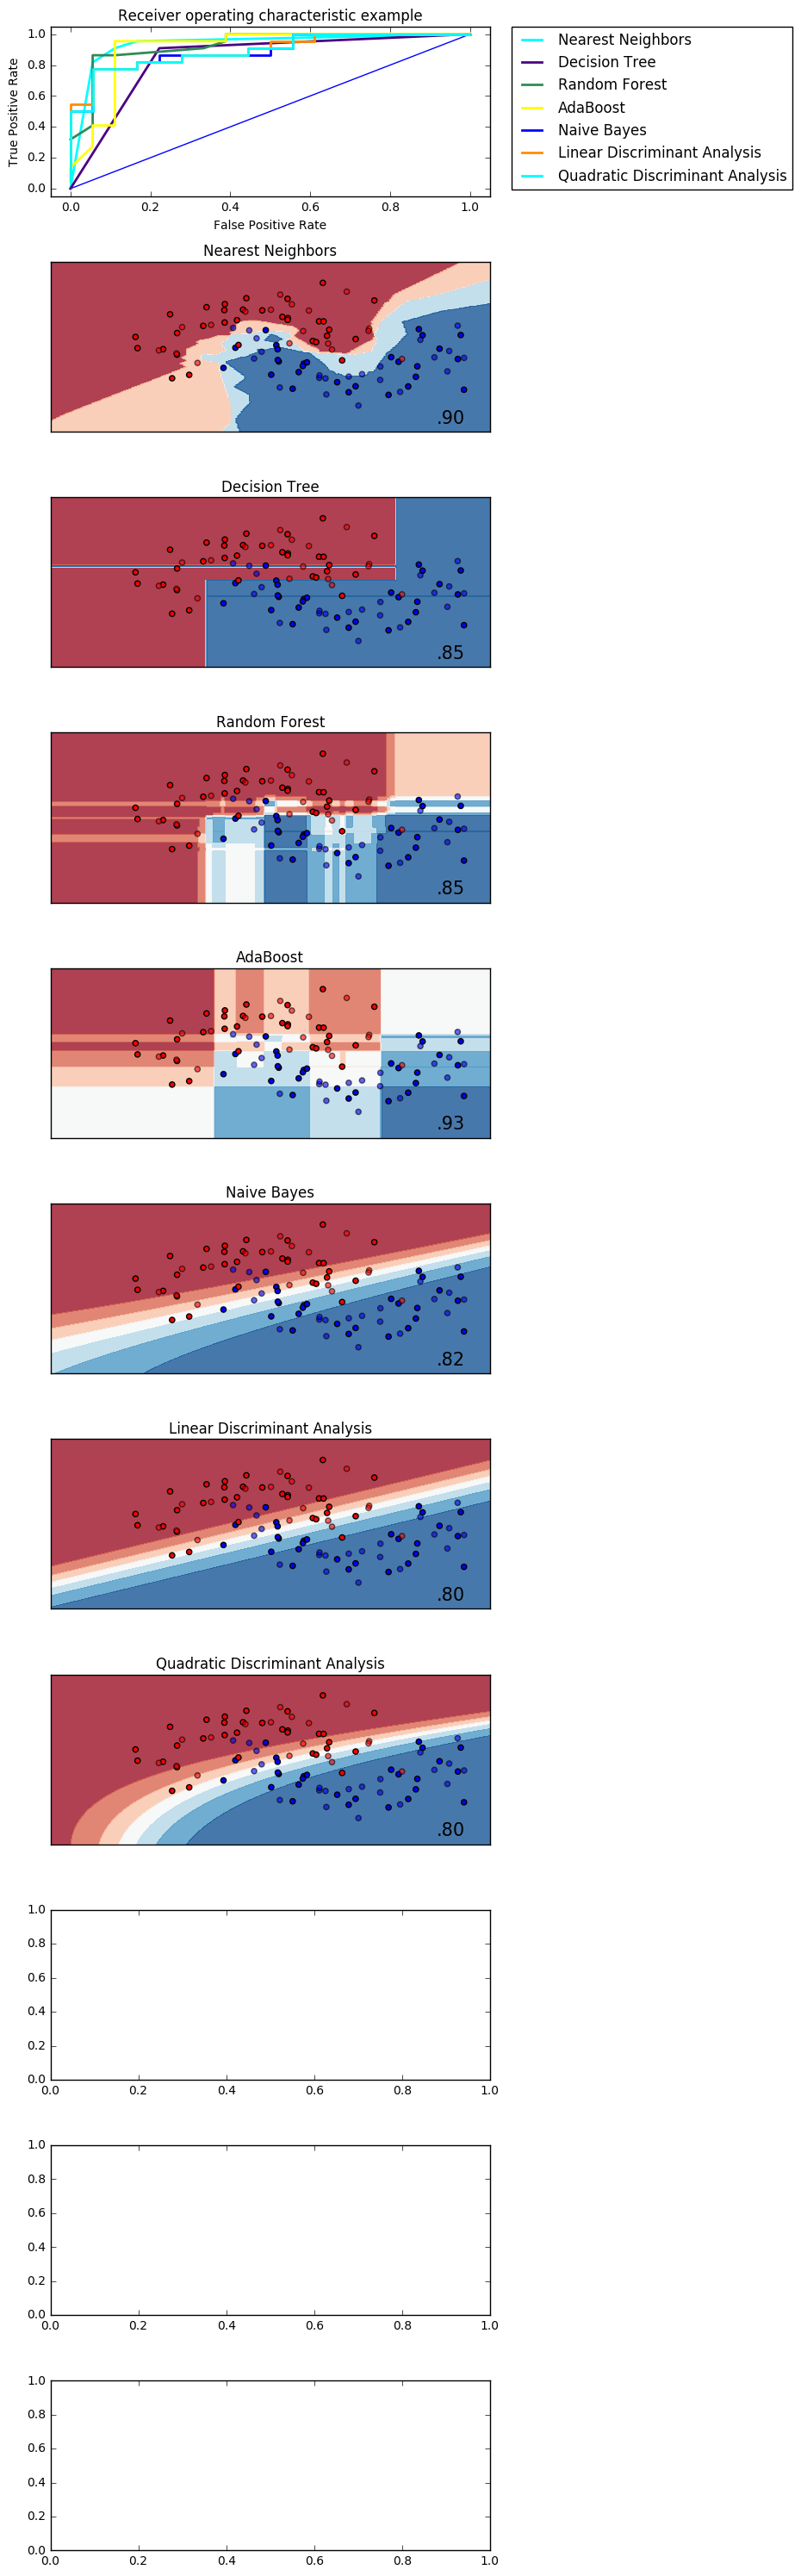

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

ds = make_moons(noise=0.3, random_state=0)

# create the ROC
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'aqua', 'cornflowerblue'])
lw = 2

f, ax = plt.subplots(len(classifiers) + 2, figsize=(6, 30))

ax[0].plot([0, 1], [0, 1])
ax[0].set_xlim([-0.05, 1.05])
ax[0].set_ylim([-0.05, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver operating characteristic example')

i = 1

cat = []
lab = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    if hasattr(clf, "predict_proba"):

        # Add to the ROC
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
        _handle, = ax[0].plot(fpr, tpr, color=colors.next(), lw=lw, label=name)
        cat.append(_handle)
        lab.append(name)
        
        # Plot the decision boundary. For that, we will assign a color to each
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax[i].contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

        ax[i].set_xlim(xx.min(), xx.max())
        ax[i].set_ylim(yy.min(), yy.max())
        ax[i].set_xticks(())
        ax[i].set_yticks(())
        ax[i].set_title(name)
        ax[i].text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        
        i += 1

ax[0].legend(cat, lab, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
plt.tight_layout()
plt.show()